In [1]:
%run phugoid.py
%matplotlib inline

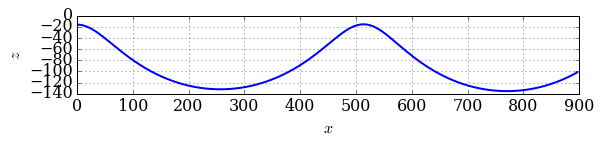

In [2]:
plot_flight_path(64.0,16.0,0.0)

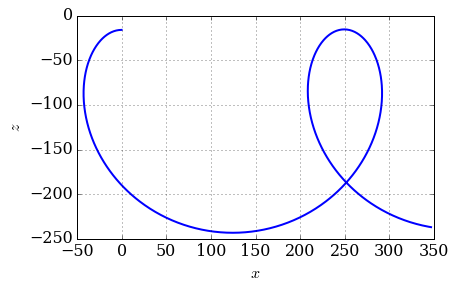

In [3]:
plot_flight_path(64.0,16.0,180.0)

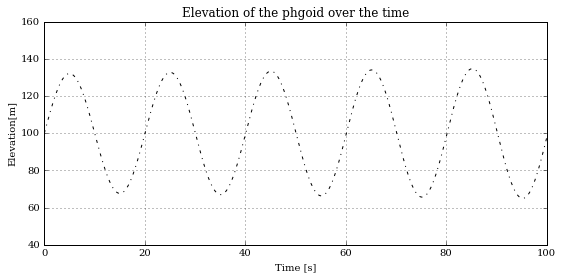

In [9]:
import numpy
from matplotlib import pyplot
%matplotlib inline

T=100.0
dt=0.02
N=int(T/dt)+1
t=numpy.linspace(0.0,T,num=N)

z0=100.0
b0=10.0
zt=100.0
g=9.82

u=numpy.array([z0,b0])
z=numpy.zeros(N)
z[0]=z0

for n in range (1,N):
    f_u=numpy.array([u[1],g*(1-u[0]/zt)])
    u = u+dt*f_u
    z[n]=u[0]

pyplot.figure(figsize=(9.0,4.0))
pyplot.title('Elevation of the phgoid over the time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation[m]')
pyplot.xlim(t[0],t[-1])
pyplot.ylim(40.0,160.0)
pyplot.grid()
pyplot.plot(t,z,color='black',linestyle='-.',linewidth=1)

In [7]:
z_exact=(b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t)+(z0-zt)*numpy.cos((g/zt)**0.5*t)+zt)

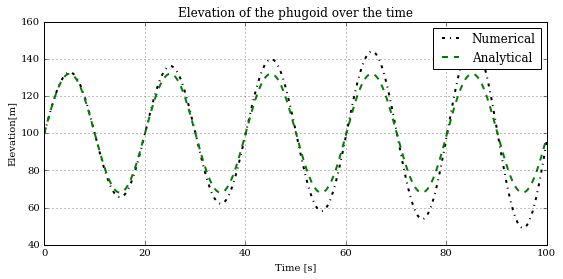

In [22]:
pyplot.figure(figsize=(9.0,4.0))
pyplot.title('Elevation of the phugoid over the time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation[m]')
pyplot.xlim(t[0],t[-1])
pyplot.ylim(40.0,160.0)
pyplot.grid()
pyplot.plot(t, z, label='Numerical',color='black', linestyle='-.', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',color='green', linestyle='--', linewidth=2)
pyplot.legend();

In [23]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Set the initial conditions.
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  
    z_values.append(z)  

In [27]:
def l1_error(z,z_exact,dt):
    error=dt*numpy.sum(numpy.abs(z-z_exact))
    return error


In [28]:
a=numpy.array([1,2,3])
b=numpy.array([4,4,4])
b-a

array([3, 2, 1])

In [29]:
error_values=[]
for z,dt in zip(z_values,dt_values):
    N=int(T/dt)+1
    t=numpy.linspace(0.0,T,num=N)
    z_exact=(b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t)+
             (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    error_values.append(l1_error(z,z_exact,dt))

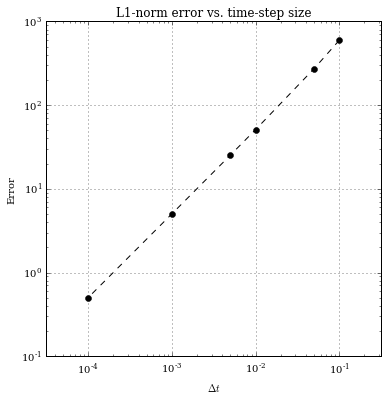

In [31]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  
pyplot.xlabel('$\Delta t$') 
pyplot.ylabel('Error')  
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='black', linestyle='--', marker='o')  
pyplot.axis('equal');

FileNotFoundError: [Errno 2] No such file or directory: '../../styles/numericalmoocstyle.css'